# 2022年7月17日18:25:31

# 1. 物理模型

假设在平面内有：
$$-\nabla^2 u= f$$
边界条件如下：
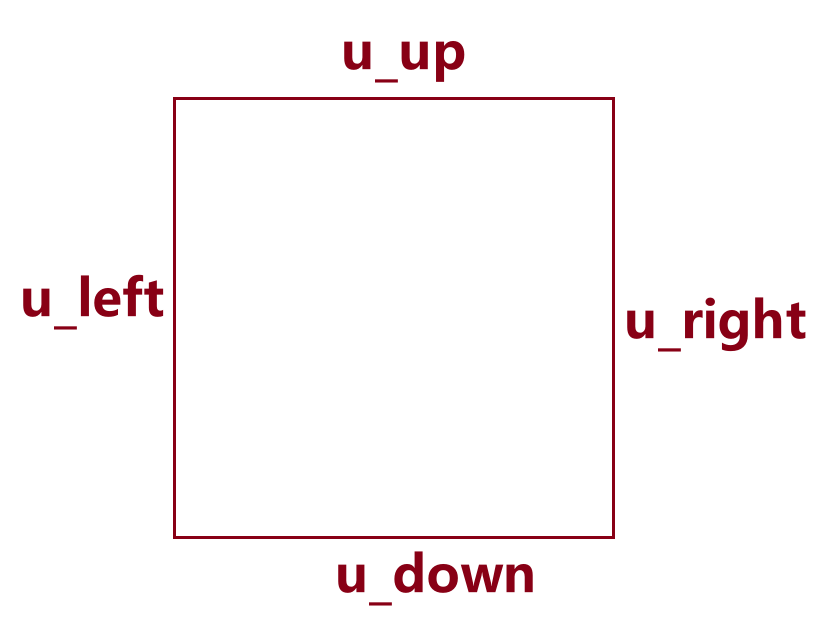

推导其弱形式：
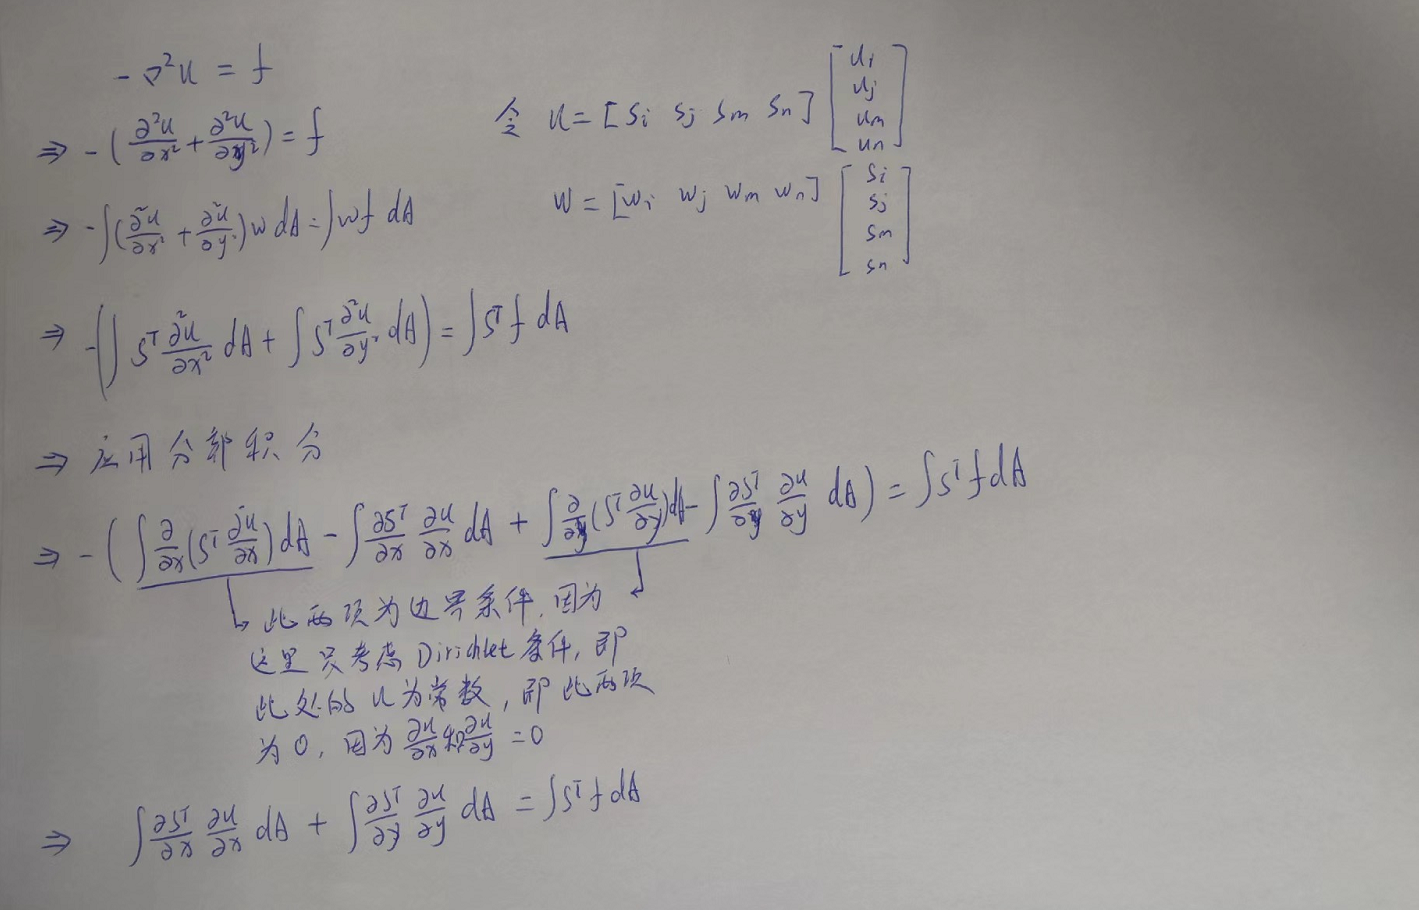

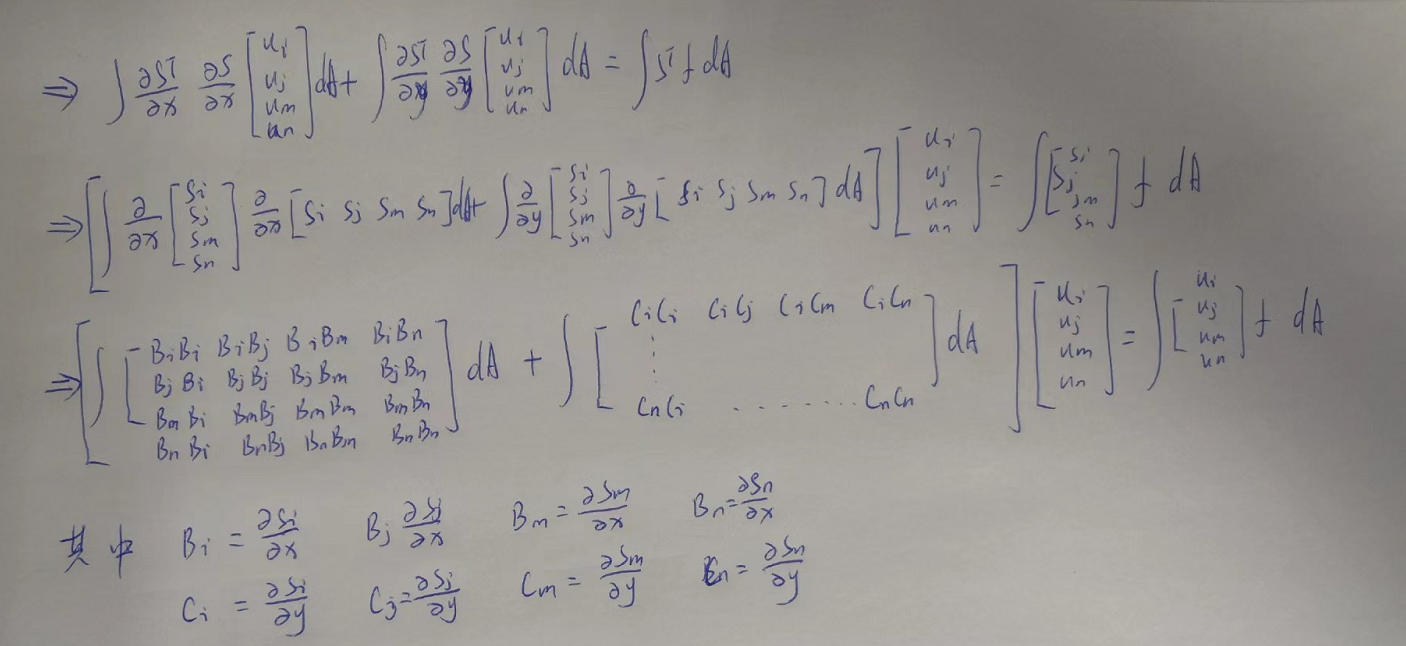

# 2. 预处理，一些需要使用的函数

## 2.1 形函数
这里二维形函数使用一维形函数组合而成。一维和二维均使用线性函数。

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.polynomial.legendre import leggauss

一维形函数及其导数

In [2]:
# 一维1次形函数
# f1l: 1 D, left f of 1 order 
def f1l1(x,xl,xr):
    return (x-xr)/(xl-xr)

# f1r: 1 D, righ f of 1 order 
def f1r1(x,xl,xr):
    return (x-xl)/(xr-xl)

In [3]:
# 定义一维一次函数的导数
def df1l1(x,xl,xr):
    return 1/(xl-xr)

def df1r1(x,xl,xr):
    return 1/(xr-xl)

二维形函数以及偏导数

In [13]:
# 定义二维形函数
# f_(i,j,m,n)表示在该点的值为1
def fi(y,x,yd,yu,xl,xr):
    return f1l1(y,yd,yu)*f1l1(x,xl,xr)

def fj(y,x,yd,yu,xl,xr):
    return f1l1(y,yd,yu)*f1r1(x,xl,xr)

def fm(y,x,yd,yu,xl,xr):
    return f1r1(y,yd,yu)*f1r1(x,xl,xr)

def fn(y,x,yd,yu,xl,xr):
    return f1r1(y,yd,yu)*f1l1(x,xl,xr)

其中$i,j,m,n$位置如下图所示：
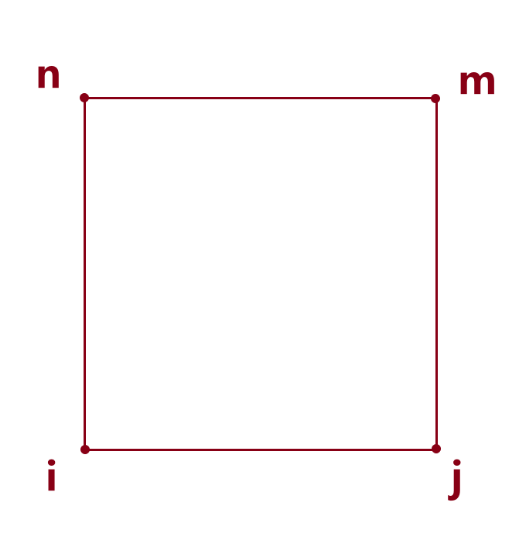

In [4]:
# 定义二维形函数的偏导数
# x
def dxfi(y,x,yd,yu,xl,xr):
    return f1l1(y,yd,yu)*df1l1(x,xl,xr)

def dxfj(y,x,yd,yu,xl,xr):
    return f1l1(y,yd,yu)*df1r1(x,xl,xr)

def dxfm(y,x,yd,yu,xl,xr):
    return f1r1(y,yd,yu)*df1r1(x,xl,xr)

def dxfn(y,x,yd,yu,xl,xr):
    return f1r1(y,yd,yu)*df1l1(x,xl,xr)

# y
def dyfi(y,x,yd,yu,xl,xr):
    return df1l1(y,yd,yu)*f1l1(x,xl,xr)

def dyfj(y,x,yd,yu,xl,xr):
    return df1l1(y,yd,yu)*f1r1(x,xl,xr)

def dyfm(y,x,yd,yu,xl,xr):
    return df1r1(y,yd,yu)*f1r1(x,xl,xr)

def dyfn(y,x,yd,yu,xl,xr):
    return df1r1(y,yd,yu)*f1l1(x,xl,xr)

## 2.2 数值积分函数

In [5]:
# 定义二维高斯-勒让德积分
def leg_gau_2d(f,n,xa,xb,ya,yb):
    x,w=leggauss(n)
    # x=(xb-xa)xi/2+(xb+xa)/2
    # y=(yb-ya)eta/2+(yb+ya)/2
    # dx=(xb-xa)/2 dxi
    # dy=(yb-ya)/2 deta
    summ=0
    for i in range(len(x)):
        # i 代表x,用a表示
        a=(xb-xa)*x[i]/2+(xb+xa)/2
        for j in range(len(x)):
            # j 代表y，用b表示
            b=(yb-ya)*x[j]/2+(yb+ya)/2
            summ+=w[i]*w[j]*f(a,b)
    
    return (xb-xa)/2*(yb-ya)/2*summ

# 3. 开始编程

## 1. 定义单元和节点

In [29]:
# 设置单元以及节点坐标
n_e_x=30 # number of elements in x 
n_e_y=30 # number of elements in y

n_n_x=n_e_x+1 # number of nodes in x
n_n_y=n_e_y+1 # number of nodes in y
x=np.linspace(0,1,n_n_x)
y=np.linspace(0,1,n_n_y)

## 2. 单元刚度矩阵

In [30]:
# 根据公式求单元刚度矩阵

# x
dx=[dxfi,dxfj,dxfm,dxfn]
Kx=np.zeros((4,4))
y0,y1=y[0],y[1]
x0,x1=x[0],x[1]
for i in range(len(dx)):
    for j in range(len(dx)):
        dfdf=lambda y,x:dx[i](y,x,y0,y1,x0,x1)*dx[j](y,x,y0,y1,x0,x1)
        Kx[i,j]=leg_gau_2d(dfdf,3,y0,y1,x0,x1)
Kx


array([[ 0.33333333, -0.33333333, -0.16666667,  0.16666667],
       [-0.33333333,  0.33333333,  0.16666667, -0.16666667],
       [-0.16666667,  0.16666667,  0.33333333, -0.33333333],
       [ 0.16666667, -0.16666667, -0.33333333,  0.33333333]])

In [31]:
# y
dy=[dyfi,dyfj,dyfm,dyfn]
Ky=np.zeros((4,4))
y0,y1=y[0],y[1]
x0,x1=x[0],x[1]
for i in range(len(dy)):
    for j in range(len(dy)):
        dfdf=lambda y,x:dy[i](y,x,y0,y1,x0,x1)*dy[j](y,x,y0,y1,x0,x1)
        Ky[i,j]=leg_gau_2d(dfdf,3,y0,y1,x0,x1)
Ky

array([[ 0.33333333,  0.16666667, -0.16666667, -0.33333333],
       [ 0.16666667,  0.33333333, -0.33333333, -0.16666667],
       [-0.16666667, -0.33333333,  0.33333333,  0.16666667],
       [-0.33333333, -0.16666667,  0.16666667,  0.33333333]])

总的刚度矩阵为：$K_e=K_x+K_y$

In [32]:
Ke=Kx+Ky
Ke

array([[ 0.66666667, -0.16666667, -0.33333333, -0.16666667],
       [-0.16666667,  0.66666667, -0.16666667, -0.33333333],
       [-0.33333333, -0.16666667,  0.66666667, -0.16666667],
       [-0.16666667, -0.33333333, -0.16666667,  0.66666667]])

# 3. 组装刚度矩阵

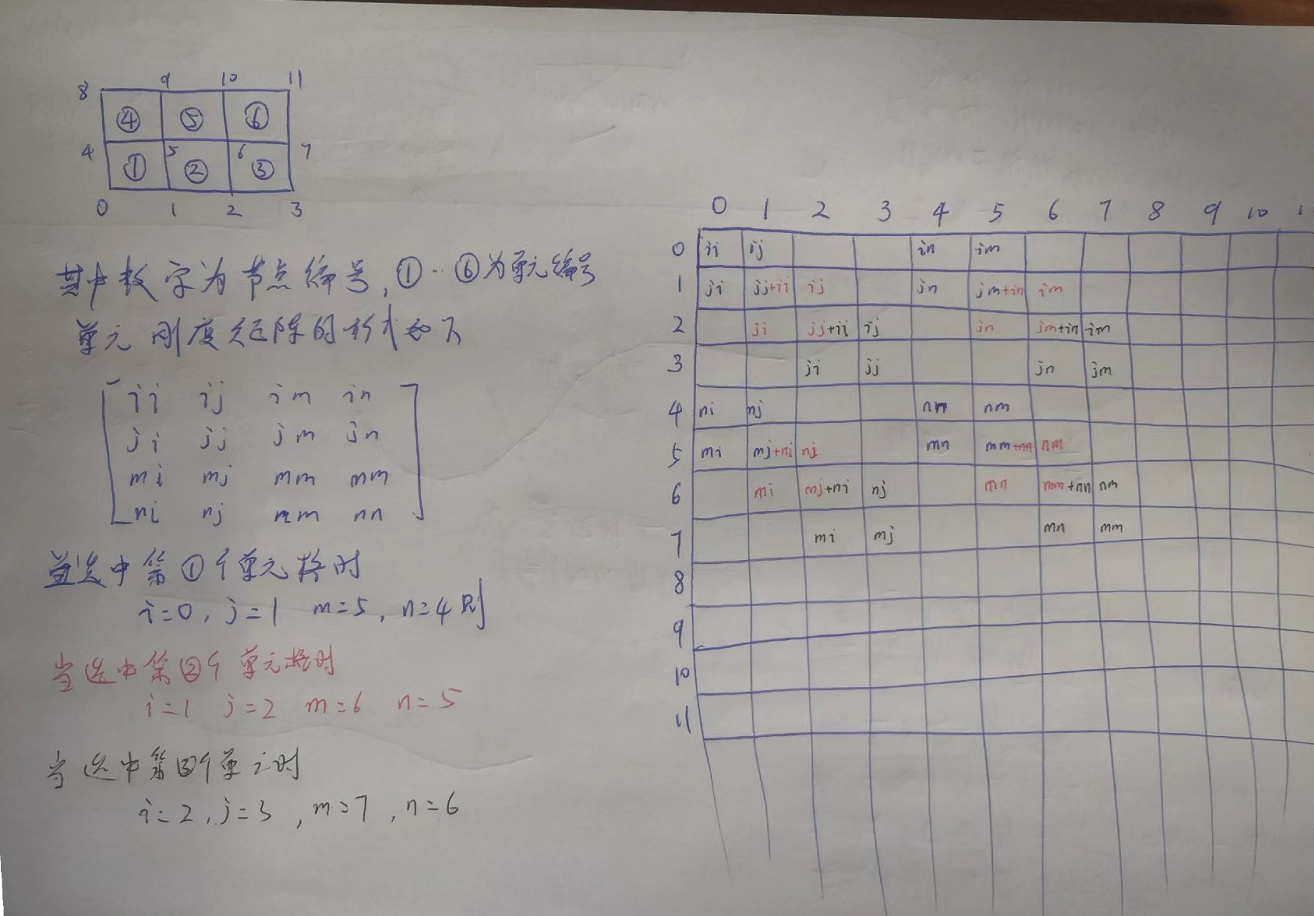

In [33]:
n_n=n_n_x*n_n_y  # 总节点个数; number of nodes
K=np.zeros((n_n,n_n))

for jy in range(n_e_y):
    for ix in range(n_e_x):
        # 不同单元中的i,j,m,n
        i=jy*n_n_x+ix
        j=i+1
        m=j+n_n_x
        n=m-1
        Kindex=[i,j,m,n]
        for ii in range(len(Kindex)):
            K[Kindex[ii],Kindex]+=Ke[ii]

# 4. 源项单元矩阵

In [34]:
# 假如q为常数
f=20
ft=[fi,fj,fm,fn]
Fe=np.zeros(4)
for i in range(len(ft)):
    ff=lambda y,x:ft[i](y,x,y0,y1,x0,x1)
    Fe[i]=leg_gau_2d(ff,3,y0,y1,x0,x1)
    
Fe=f*Fe

# 5. 组装源项矩阵

In [35]:
F=np.zeros(n_n)

for jy in range(n_e_y):
    for ix in range(n_e_x):
        # 不同单元中的i,j,m,n
        i=jy*n_n_x+ix
        j=i+1
        m=j+n_n_x
        n=m-1
        Findex=[i,j,m,n]
        F[Findex]+=Fe

# 6. 设置边界条件

In [36]:
# 先假如只有左右两边，且为Dirichlet边界条件
# 数字为任意设置的
left=0.5
right=5
up=2
down=3
# 左边
# 确定左边的边界的节点index
il=[]  # index of lf
for i in range(n_n_y):
    il.append(i*n_n_x)

# 右边
# 确定右边边界的节点index
ir=[]
for i in range(n_n_y):
    ir.append(i*n_n_x+n_e_x)
    
# 现在吧上下也加上
# 下边
idd=[i for i in range(n_n_x)]

# 上边
iu=[]
for i in range(n_n_x):
    iu.append(i+n_e_y*n_n_x)


In [37]:
F[il]=left
F[ir]=right
F[idd]=down
F[iu]=up

K[il]=0
K[il,il]=1
K[ir]=0
K[ir,ir]=1
K[idd]=0
K[idd,idd]=1
K[iu]=0
K[iu,iu]=1

# 7. 求解

In [38]:
U=np.zeros(n_n)
U[:]=np.linalg.solve(K,F)

# 8. 结果展示

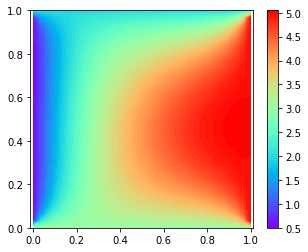

In [46]:
res=U.reshape((n_n_y,n_n_x))
X,Y=np.meshgrid(x,y)
plt.figure(figsize=(5,4))
plt.contourf(X,Y,res,100,cmap='rainbow')
plt.axis('equal')
plt.colorbar()